In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [10]:
data = yf.download("AAPL", start="2023-01-01", end="2023-11-30")
#define portfolio as an array of times [16day, 11day, 6day, 1day, out of market]
durations = [4, 3, 2, 1, 0]
indexers = []
for t in durations:
    indexers.append(pd.api.indexers.FixedForwardWindowIndexer(window_size=t))
portfolio = [0, 0, 0, 0, 1]
data = data.drop(columns=["Open", "High", "Low", "Close", "Volume"])
data["returns"] = data["Adj Close"].pct_change() + 1
data["returns"][0] = 1
data["compound returns"] = (data["returns"]).cumprod()
data["16day"] = data["returns"].rolling(window=indexers[0]).apply(np.prod, raw=True) **  (1/durations[0])
data["11day"] = data["returns"].rolling(window=indexers[1]).apply(np.prod, raw=True) **  (1/durations[1])
data["6day"] = data["returns"].rolling(window=indexers[2]).apply(np.prod, raw=True) **  (1/durations[2])
data["1day"] = data["returns"].rolling(window=indexers[3]).apply(np.prod, raw=True) **  (1/durations[3])
data["out of market"] = np.ones(len(data))
data.dropna(inplace=True)
data["best return"] = data[["16day", "11day", "6day", "1day", "out of market"]].max(axis=1)
data["buy signal"] = data["best return"] > 1
data["strategy returns"] = data.apply(lambda row: row['returns'] if row['buy signal'] else 1, axis=1)
#print(data)
print(data[data["best return"] == 1.0])
print("time portfolio: ",data["strategy returns"].cumprod()[-1])
print("buy and hold: ", data["compound returns"][-1])



[*********************100%%**********************]  1 of 1 completed
             Adj Close   returns  compound returns     16day     11day  \
Date                                                                     
2023-02-08  151.075562  0.982347          1.214680  0.999085  0.992597   
2023-02-16  153.089005  0.989571          1.230868  0.989503  0.985079   
2023-02-17  151.933685  0.992453          1.221579  0.992915  0.989481   
2023-02-21  147.880127  0.973320          1.188988  0.990289  0.993069   
2023-02-24  146.117279  0.981995          1.174814  0.993085  0.995540   
2023-03-07  150.987534  0.985504          1.213972  0.991223  0.992929   
2023-03-09  149.981598  0.985085          1.205884  0.999542  0.994739   
2023-04-04  164.960846  0.996750          1.326320  0.993712  0.996962   
2023-04-05  163.098389  0.988710          1.311346  0.992629  0.992702   
2023-04-20  165.976700  0.994154          1.334488  0.994193  0.995405   
2023-04-21  164.353317  0.990219          1

/var/folders/5m/v99rlgmj775cprgbnnjgyp0c0000gn/T/ipykernel_49563/3296269137.py:10: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  data["returns"][0] = 1
/var/folders/5m/v99rlgmj775cprgbnnjgyp0c0000gn/T/ipykernel_49563/3296269137.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("time portfolio: ",data["strategy returns"].cumprod()[-1])
/var/folders/5m/v99rlgmj775cprgbnnjgyp0c0000gn/T/ipykernel_49563/3296269137.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access

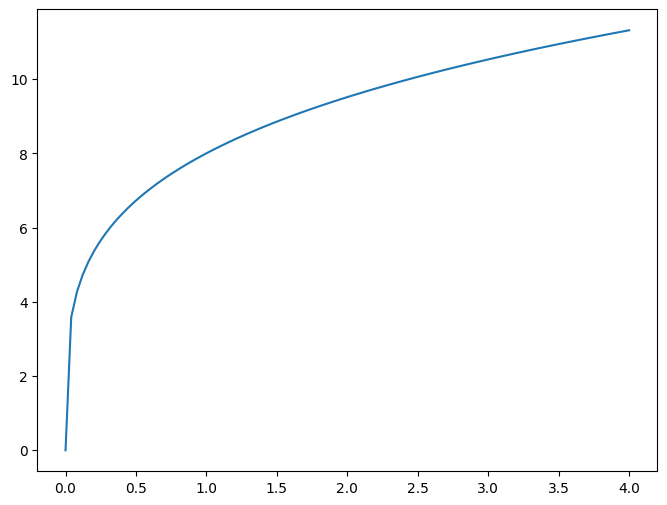

In [8]:

import matplotlib.pyplot as plt
import numpy as np

x = np.array(np.linspace(0, 4, 100))
convex = x**1.75
concave = 8*x**0.25

plt.figure(figsize=(8, 6))
#plt.plot(x, convex)
plt.plot(x, concave)
#plt.xlabel('x')
#plt.ylabel('Function Values')
#plt.title('Convex and Concave Functions')
#plt.legend()
plt.grid(False)
plt.show()


